In [1]:
import pandas as pd
import numpy as np
import os
from math import comb
from scipy.spatial.distance import hamming

from dredFISH.Utils.__init__plots import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comb(18,4)

3060

In [3]:
pth = '/scratch/test_merfish_FX_results'
f = os.path.join(pth, 'zebrafinch_codebook_remade.csv')
codebook = pd.read_csv(f, index_col=0)
codebook

,RS0095,RS0109,RS0175,RS0237,RS0307,RS0332,RS0384,RS0406,RS0451,RS0468,RS0548,RS64.0,RS156.0,RS278.0,RS313.0,RS643.0,RS740.0,RS810.0
FOXP4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
AR,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
SLIT2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
DRD3,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
SATB2,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
blank12,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0
blank13,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
blank14,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
blank15,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0


In [4]:
codebook.index.tolist()

['FOXP4',
 'AR',
 'SLIT2',
 'DRD3',
 'SATB2',
 'CUX2',
 'SLIT3',
 'NES',
 'DAB1',
 'PRKD1',
 'ZNF462',
 'BAZ2B',
 'P2RY12',
 'CPEB1',
 'CPEB2',
 'CPEB3',
 'CPEB4',
 'MAPK13',
 'SRGAP2',
 'ROBO2',
 'HCN4',
 'TMEM119',
 'MNT',
 'MAPK11',
 'POU3F2',
 'TNRC6B',
 'INO80D',
 'NPAS3',
 'PRKD3',
 'ARID4B',
 'FOXP2',
 'CHD2',
 'PLCL2',
 'CDH11',
 'JMJD1C',
 'ROBO1',
 'SLIT1',
 'PHF6',
 'SS18L1',
 'VLDLR',
 'DCX',
 'GABBR2',
 'TNPO1',
 'SLC1A1',
 'SS18',
 'BRWD3',
 'MEF2C',
 'TCF20',
 'CHAT',
 'KMT2C',
 'SPTY2D1',
 'TLK2',
 'IRS4',
 'CHD1',
 'HDAC4',
 'OTUD7A',
 'MLLT10',
 'MED13L',
 'ELAVL2',
 'CCDC88A',
 'SOS1',
 'UBR5',
 'MED13',
 'FGD6',
 'PTBP2',
 'KBTBD11',
 'NCOA1',
 'CASP3',
 'ELAVL1',
 'FAM184A',
 'MAPK10',
 'BMI1',
 'FMR1',
 'ZEB1',
 'PIK3C2A',
 'SERTAD2',
 'ATP8A1',
 'UPF2',
 'SIRT1',
 'STK40',
 'COMT',
 'FOXP1',
 'ATF6',
 'AFF4',
 'PTCHD1',
 'GIGYF2',
 'RERE',
 'PPIG',
 'PTPN12',
 'RELN',
 'MED14',
 'STAU2',
 'PHF20',
 'CSE1L',
 'TERF2',
 'ZNF827',
 'TRIM23',
 'EML1',
 'CTNND2',
 'IG

In [5]:
channels = codebook.index.values

codes2 = codebook.filter(regex='^blank', axis=0)
chan2 = codes2.index.values

chan1 = np.array([chan for chan in channels if chan not in chan2])
codes1 = codebook.loc[chan1]
print(codebook.shape, codes1.shape, codes2.shape)

(187, 18) (170, 18) (17, 18)


In [6]:
codebook.sum(axis=1).unique()

array([4])

In [7]:
codebook.sum(axis=0) #.unique()

RS0095     42
RS0109     39
RS0175     43
RS0237     41
RS0307     42
RS0332     41
RS0384     41
RS0406     42
RS0451     41
RS0468     41
RS0548     40
RS64.0     41
RS156.0    44
RS278.0    42
RS313.0    43
RS643.0    41
RS740.0    40
RS810.0    44
dtype: int64

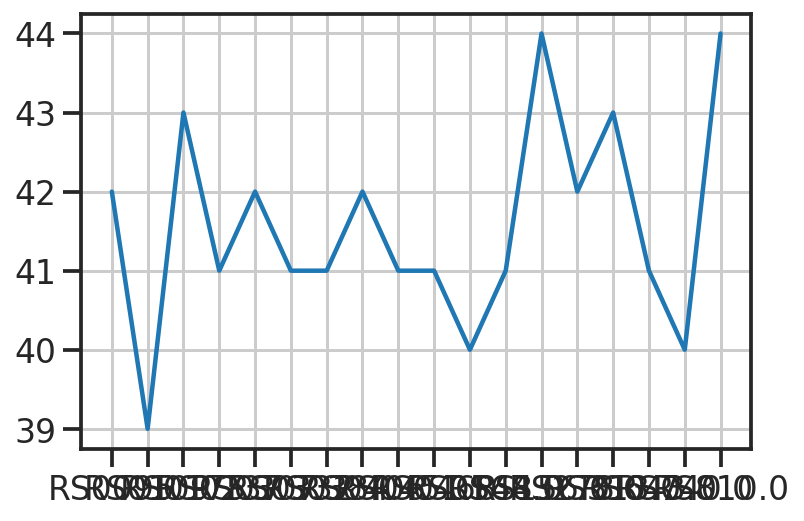

In [8]:
plt.plot(codebook.sum(axis=0)) #.unique()

<AxesSubplot:>

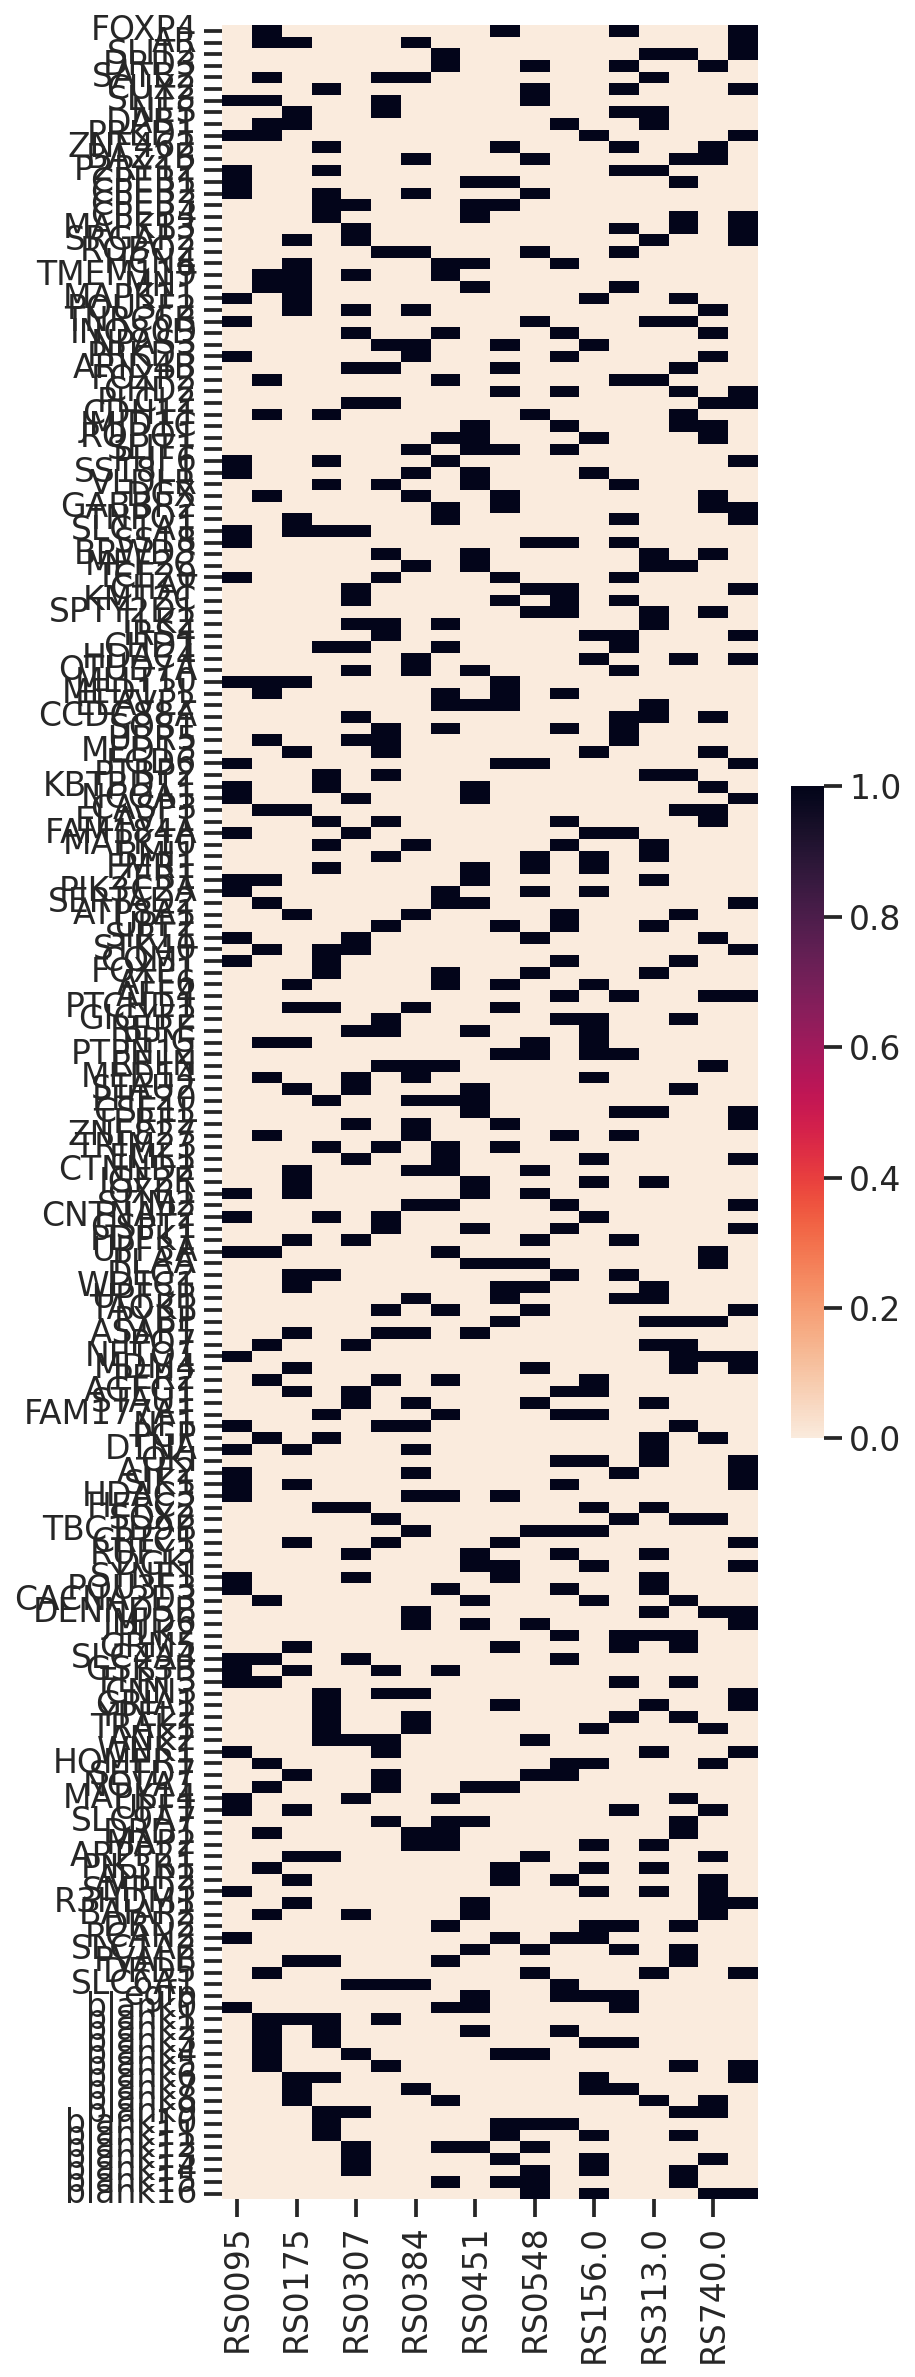

In [9]:
fig, ax = plt.subplots(figsize=(6,20))
sns.heatmap(codebook, 
            yticklabels=True,
            ax=ax, 
            cmap='rocket_r', 
            cbar_kws=dict(shrink=0.3),
           )

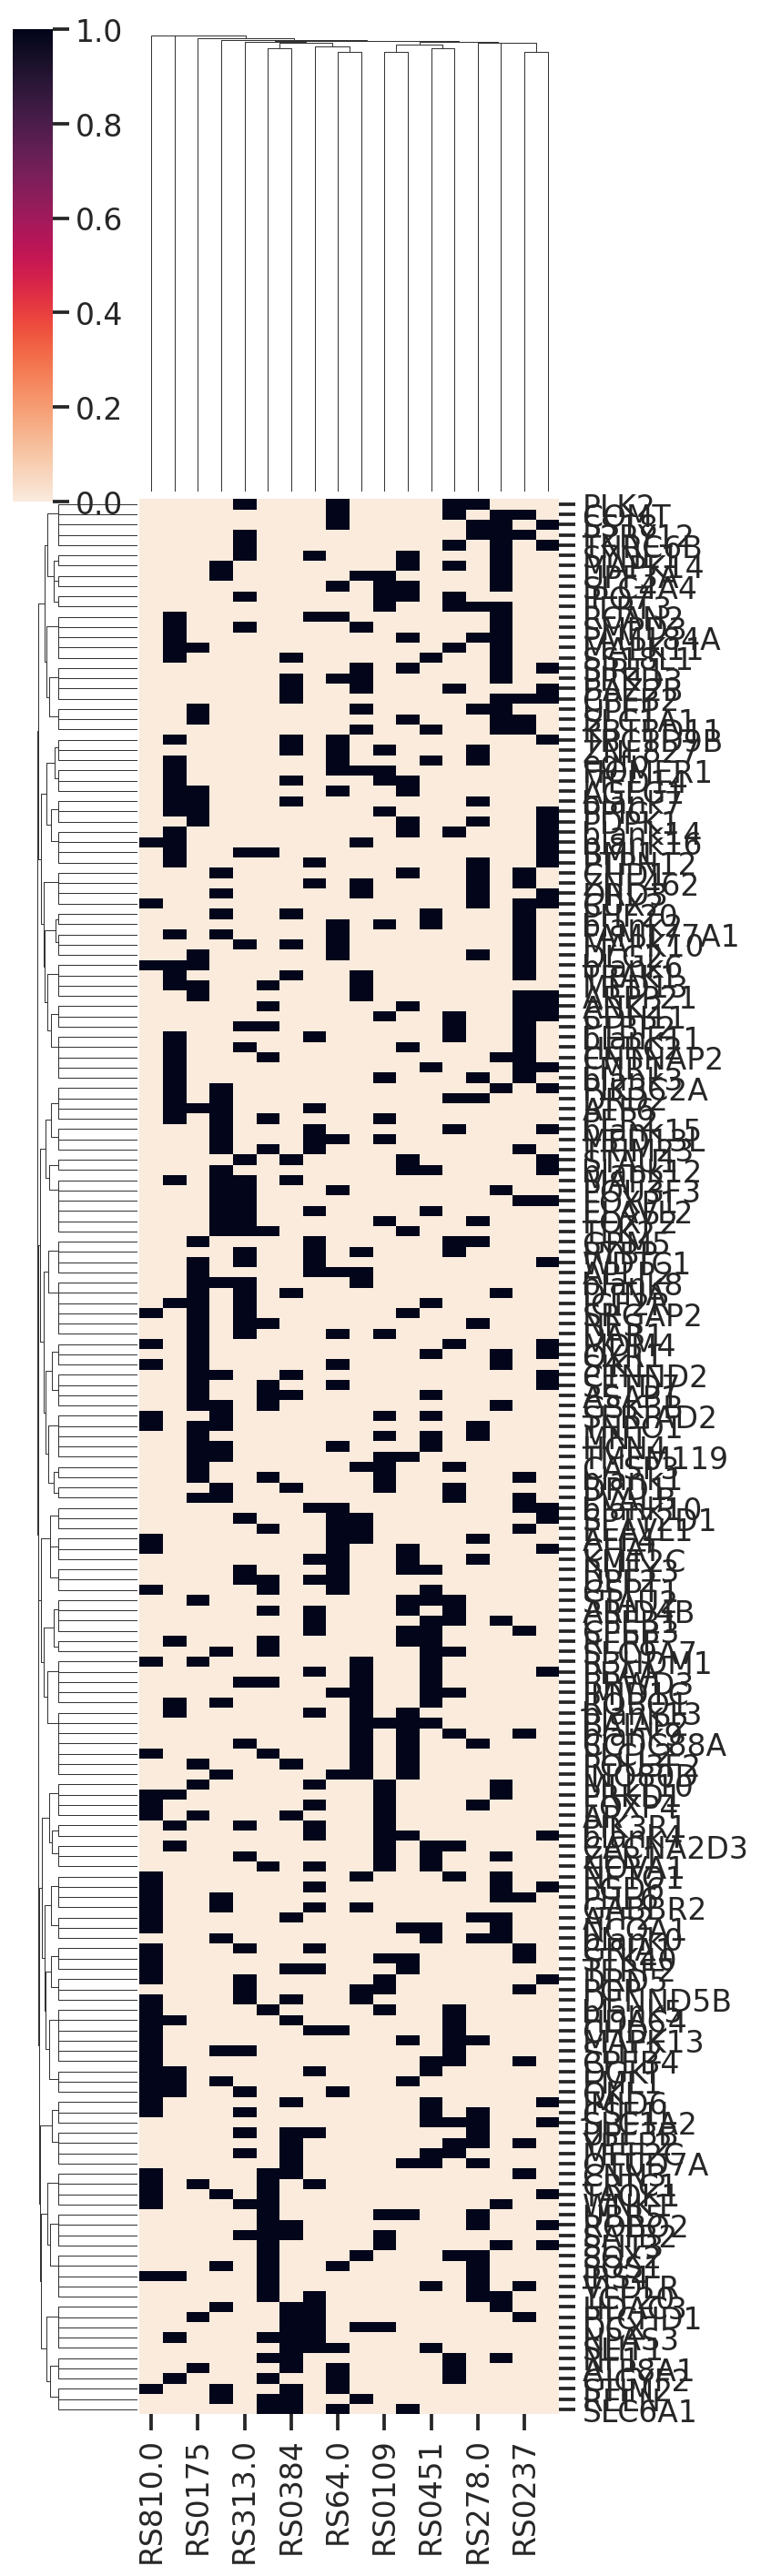

In [10]:
sns.clustermap(
            codebook, 
            yticklabels=True,
            # ax=ax, 
            cmap='rocket_r', 
            # cbar_kws=dict(shrink=0.3),
            figsize=(6,20),
           )

In [11]:
# check pairwise distance
dists = np.zeros((len(codebook), len(codebook)))
for i in range(len(codebook)):
    for j in range(len(codebook)):
        ic = codebook.iloc[i].values
        jc = codebook.iloc[j].values
        dists[i,j] = hamming(ic, jc)*18

<AxesSubplot:>

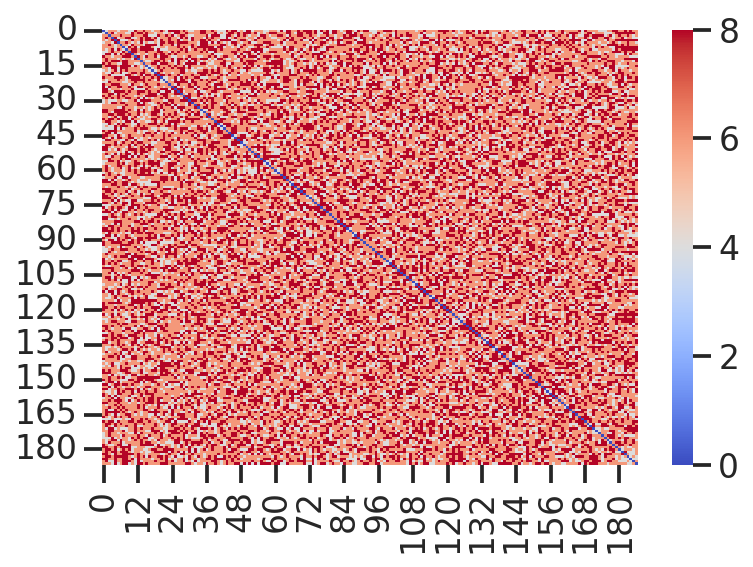

In [12]:
sns.heatmap(dists, cmap='coolwarm')

<AxesSubplot:ylabel='Count'>

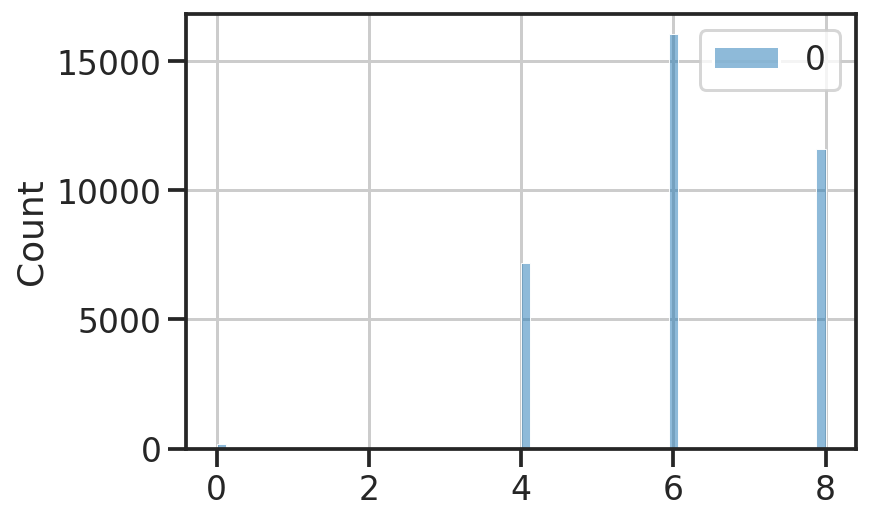

In [13]:
sns.histplot(dists.reshape(-1,1))